## Лабораторная работа №2 по курсу "Нейроинформатика" на тему "Линейная нейронная сеть. Правило обучения Уидроу-Хоффа"

### Вариант 10
Выполнил студент Шавандрин Фёдор  
Группа М8О-408Б-19

In [1]:
# импортируем библиотеки
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt

Функции сигналов и параметры.

In [2]:
def IN_SIG1(t):
    return np.sin(-2*t**2 + 7*t) - np.sin(t) / 2

def IN_SIG2(t):
    return np.sin(t**2 - 6*t + 3)

def OUT_SIG(t):
    return np.sin(t**2 - 6*t - np.pi // 6) / 3

h1 = 0.025
h2 = 0.025

range1 = (0, 4.5)
range2 = (0, 6)

### Задание 1
#### Предсказать следующий элемент последовательности

In [3]:
# generating dataset for training
t1 = np.linspace(range1[0], range1[1], int((range1[1] - range1[0]) / h1))
x1 = IN_SIG1(t1)

In [4]:
def create_dataset(x, delay=5):
    x_train = np.array([np.hstack([x[i:i + delay]]) for i in range(len(x) - delay)])
    y_train = x[delay:]
    assert x_train.shape[0] == y_train.shape[0]
    return x_train, y_train

In [5]:
x_train1, y_train1 = create_dataset(x1)
x_train1.shape, y_train1.shape

((175, 5), (175,))

In [6]:
x_train1[:3], y_train1[:3]

(array([[0.        , 0.16125764, 0.31485436, 0.45621546, 0.58146065],
        [0.16125764, 0.31485436, 0.45621546, 0.58146065, 0.68746571],
        [0.31485436, 0.45621546, 0.58146065, 0.68746571, 0.77189085]]),
 array([0.68746571, 0.77189085, 0.83317904]))

#### Обучение модели
В качестве лосса использовал MSE, в качестве оптимизатора - Adam, и буду считать метрику RMSE(Root Mean Squared Error).

In [7]:
model1 = keras.Sequential()
model1.add(keras.layers.Dense(1))

In [8]:
model1.compile(loss='mse', optimizer='adam', metrics=tf.keras.metrics.RootMeanSquaredError())

In [9]:
train_info1 = model1.fit(x_train1, y_train1, batch_size=1, epochs=50)

Epoch 1/50
175/175 [==============================] - 1s 2ms/step - loss: 5.3978 - root_mean_squared_error: 2.3233
Epoch 2/50
175/175 [==============================] - 0s 2ms/step - loss: 3.1106 - root_mean_squared_error: 1.7637
Epoch 3/50
175/175 [==============================] - 0s 2ms/step - loss: 1.6704 - root_mean_squared_error: 1.2924
Epoch 4/50
175/175 [==============================] - 0s 2ms/step - loss: 0.8351 - root_mean_squared_error: 0.9138
Epoch 5/50
175/175 [==============================] - 0s 2ms/step - loss: 0.3965 - root_mean_squared_error: 0.6297
Epoch 6/50
175/175 [==============================] - 0s 2ms/step - loss: 0.1883 - root_mean_squared_error: 0.4339
Epoch 7/50
175/175 [==============================] - 0s 2ms/step - loss: 0.0987 - root_mean_squared_error: 0.3141
Epoch 8/50
175/175 [==============================] - 0s 2ms/step - loss: 0.0621 - root_mean_squared_error: 0.2493
Epoch 9/50
175/175 [==============================] - 0s 2ms/step - loss: 0.0463

Посмотрим на получившиеся веса нашей модели.

In [10]:
model1.layers[0].get_weights()

[array([[-0.21386918],
        [-0.24374326],
        [ 0.3997451 ],
        [-0.1601631 ],
        [ 1.1890254 ]], dtype=float32),
 array([-0.01014065], dtype=float32)]

#### Построение графиков

In [11]:
def create_plot(train_info):
    plt.figure(figsize=(15, 8))

    plt.subplot(1, 2, 1)
    loss_history = train_info.history['loss']
    plt.xlabel('epoch')
    plt.ylabel('mse')
    plt.plot(range(1, len(loss_history) + 1), loss_history)
    plt.grid()
    plt.title('Loss')

    plt.subplot(1, 2, 2)
    loss_history = train_info.history['root_mean_squared_error']
    plt.xlabel('epoch')
    plt.ylabel('rmse')
    plt.plot(range(1, len(loss_history) + 1), loss_history)
    plt.grid()
    plt.title('RMSE')

    plt.show()

Посмотрим на графики лосса и метрики RMSE.

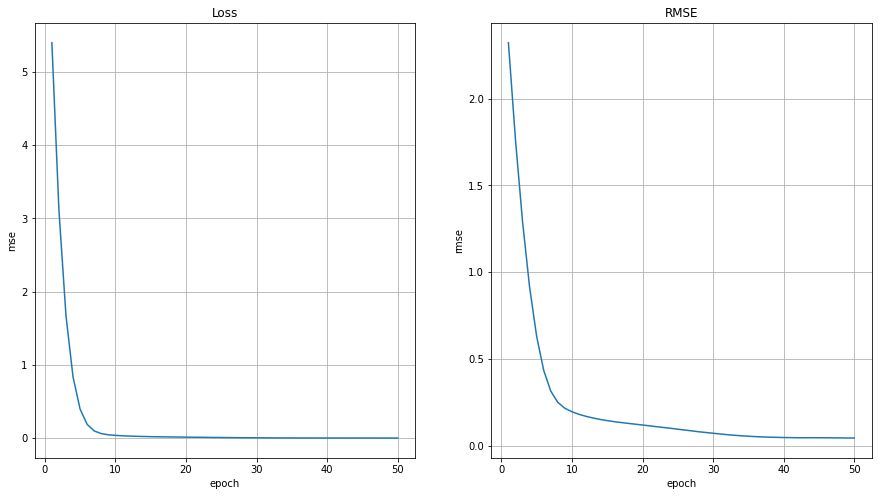

In [12]:
create_plot(train_info1)

#### Визуализация результатов предсказания модели

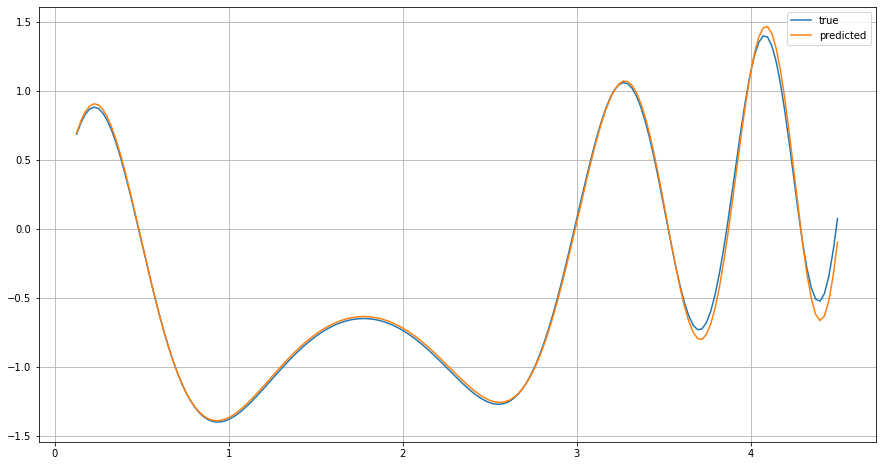

In [13]:
plt.figure(figsize=(15, 8))

plt.plot(t1[5:], x1[5:], label='true')
plt.plot(t1[5:], model1.predict(x_train1), label='predicted')
plt.legend()
plt.grid()
plt.show()

Исходя из графиков выше, можно сделать вывод о том, что наша модель довольно неплохо предсказывает следующую точку функции.

### Задание 2
#### Обучить адаптивный линейный фильтр

In [14]:
t3 = np.linspace(range2[0], range2[1], int((range2[1] - range2[0]) / h2))
x3 = IN_SIG2(t3)
y3 = OUT_SIG(t3)

In [15]:
def create_filter_dataset(x, y, delay=5):
    x_train = np.array([np.hstack([x[i:i+delay]]) for i in range(len(x) - delay)])
    y_train = y[delay:]
    assert x_train.shape[0] == y_train.shape[0]
    return x_train, y_train

In [16]:
x_train3, y_train3 = create_filter_dataset(x3, y3)
x_train3.shape, y_train3.shape

((235, 5), (235,))

#### Обучение модели
Как и в предыдущем задании, в качестве лосса буду использовать MSE, в качестве оптимизатора - Adam, и считать метрику RMSE(Root Mean Squared Error).

In [17]:
model3 = keras.Sequential()
model3.add(keras.layers.Dense(1))

In [18]:
model3.compile(loss='mse', optimizer='adam', metrics=tf.keras.metrics.RootMeanSquaredError())

In [19]:
train_info3 = model3.fit(x_train3, y_train3, batch_size=1, epochs=50)

Epoch 1/50
235/235 [==============================] - 1s 2ms/step - loss: 0.0287 - root_mean_squared_error: 0.1693
Epoch 2/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0240 - root_mean_squared_error: 0.1550
Epoch 3/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0204 - root_mean_squared_error: 0.1427
Epoch 4/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0175 - root_mean_squared_error: 0.1321
Epoch 5/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0147 - root_mean_squared_error: 0.1211
Epoch 6/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0123 - root_mean_squared_error: 0.1107
Epoch 7/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0102 - root_mean_squared_error: 0.1012
Epoch 8/50
235/235 [==============================] - 0s 1ms/step - loss: 0.0086 - root_mean_squared_error: 0.0927
Epoch 9/50
235/235 [==============================] - 0s 1ms/step - loss: 0.0070

Посмотрим на веса нашей модели.

In [20]:
model3.layers[0].get_weights()

[array([[ 0.6069371 ],
        [-0.39866415],
        [-0.1053445 ],
        [-0.6807444 ],
        [ 0.2596914 ]], dtype=float32),
 array([-0.01322851], dtype=float32)]

#### Построение графиков

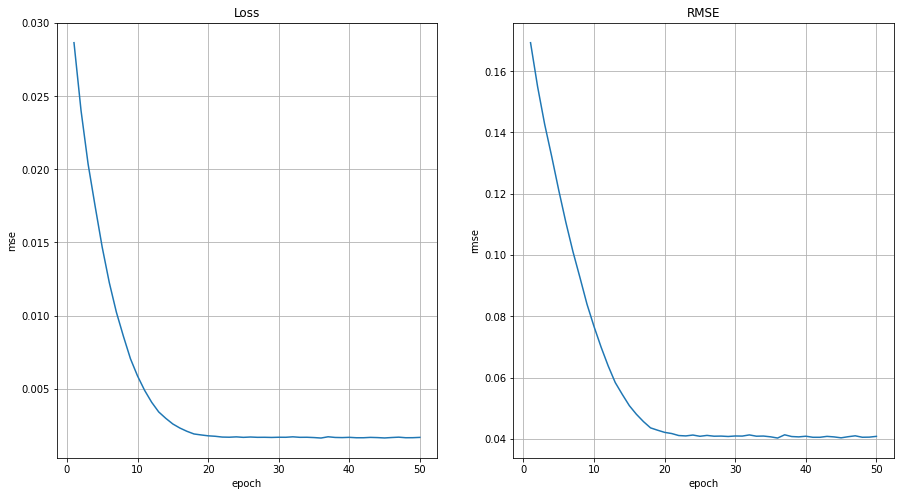

In [21]:
create_plot(train_info3)

#### Визуализация результатов предсказания модели

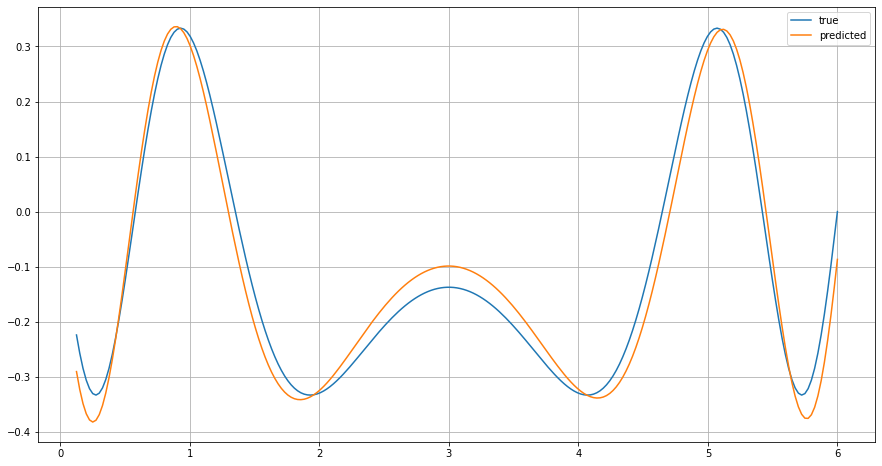

In [22]:
plt.figure(figsize=(15, 8))

plt.plot(t3[5:], OUT_SIG(t3[5:]), label='true')
plt.plot(t3[5:], model3.predict(x_train3), label='predicted')
plt.legend()
plt.grid()
plt.show()

Модель довольно точно предсказала выходной сигнал.

### Вывод
В данной лабораторной работе изучил правило обучения Уидроу-Хоффа нейронной сети, обучил модель предсказывать следующее значение последовательности, при этом получив достаточно высокую точность модели.

Также реализовал адаптивный линейный фильтр, который также достаточно точно предсказывал значение выходного сигнала.